In [ ]:
%pip install flaml[notebook]==1.0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flaml.data import load_openml_dataset
X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=40536, data_dir='./')
print("Data type:", type(X_train), type(y_train))
print("The first 5 rows of X_train:")
print(X_train.head())
print("The first 5 rows of y_train:")
print(y_train.head())

download dataset from openml


DEBUG:openml.datasets.dataset:Saved dataset 40536: SpeedDating to file /root/.openml/cache/org/openml/www/datasets/40536/dataset.pkl.py3
INFO:openml.datasets.dataset:Going to remove the following attributes: ['decision', 'decision_o']


Dataset name: SpeedDating
X_train.shape: (6283, 120), y_train.shape: (6283,);
X_test.shape: (2095, 120), y_test.shape: (2095,)
Data type: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
The first 5 rows of X_train:
     has_null  wave  gender   age  age_o  d_age d_d_age  \
5546        1  14.0    male  25.0   32.0    7.0  [7-37]   
235         0   2.0  female  21.0   24.0    3.0   [2-3]   
7066        1  19.0  female  26.0   29.0    3.0   [2-3]   
7357        1  20.0  female  25.0   27.0    2.0   [2-3]   
1108        0   4.0  female  28.0   27.0    1.0   [0-1]   

                                       race  \
5546            European/Caucasian-American   
235   Asian/Pacific Islander/Asian-American   
7066            European/Caucasian-American   
7357                 Black/African American   
1108            European/Caucasian-American   

                                     race_o samerace  ...  \
5546            European/Caucasian-American        1  ...   

In [ ]:
from flaml import AutoML
automl = AutoML()

In [ ]:
settings = {
    "time_budget": 5,  # total running time in seconds
    "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'classification',  # task type
    "log_file_name": 'breast_cancer.log',  # flaml log file
    "seed": 340192,    # random seed
}

In [ ]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 10-19 18:47:21] {2540} INFO - task = classification
INFO:flaml.automl:task = classification
[flaml.automl: 10-19 18:47:21] {2542} INFO - Data split method: stratified
INFO:flaml.automl:Data split method: stratified
[flaml.automl: 10-19 18:47:21] {2545} INFO - Evaluation method: holdout
INFO:flaml.automl:Evaluation method: holdout
[flaml.automl: 10-19 18:47:22] {2664} INFO - Minimizing error metric: 1-accuracy
INFO:flaml.automl:Minimizing error metric: 1-accuracy
[flaml.automl: 10-19 18:47:22] {2806} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 10-19 18:47:22] {3108} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 10-19 18:47:22] {3242} INFO - Estimated sufficient time budget=2748s. Estimated nec

In [ ]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 13, 'num_leaves': 16, 'min_child_samples': 14, 'learning_rate': 0.1412631187096335, 'log_max_bin': 9, 'colsample_bytree': 1.0, 'reg_alpha': 0.0016858160574205194, 'reg_lambda': 4.948526085973791}
Best accuracy on validation data: 0.8605
Training duration of best run: 0.4624 s


In [ ]:
!pip install --upgrade pip==21.3
!pip install -U seaborn scikit-learn model-card-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

In [ ]:
X_train.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met
5546,1,14.0,male,25.0,32.0,7.0,[7-37],European/Caucasian-American,European/Caucasian-American,1,...,NaN,5.0,[7-10],[0-3],[3-5],5.0,7.0,[0-5],[7-10],0.0
235,0,2.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,3.0,3.0,[5-6],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
7066,1,19.0,female,26.0,29.0,3.0,[2-3],European/Caucasian-American,Latino/Hispanic American,0,...,NaN,NaN,[0-4],[0-3],[0-2],9.0,NaN,[9-10],[0-4],0.0
7357,1,20.0,female,25.0,27.0,2.0,[2-3],Black/African American,Asian/Pacific Islander/Asian-American,0,...,NaN,1.0,[5-6],[0-3],[0-2],5.0,4.0,[0-5],[0-4],0.0
1108,0,4.0,female,28.0,27.0,1.0,[0-1],European/Caucasian-American,European/Caucasian-American,1,...,6.0,2.0,[5-6],[4-9],[0-2],8.0,8.0,[6-8],[7-10],0.0


In [ ]:
'''
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
'''

'\nfrom lightgbm import LGBMClassifier\nlgbm = LGBMClassifier()\n'

In [ ]:
from flaml.default import LGBMClassifier
lgbm = LGBMClassifier()

In [ ]:
clf = lgbm.fit(X_train, y_train)

INFO:flaml.default.suggest:metafeature distance: 0.7457704376133013


In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


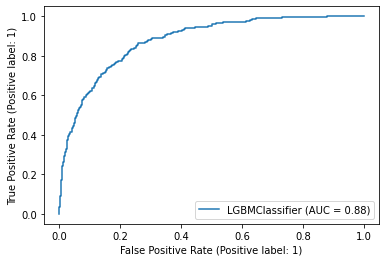

In [ ]:
plot_roc_curve(clf, X_test, y_test)
roc_curve = plot_to_str()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


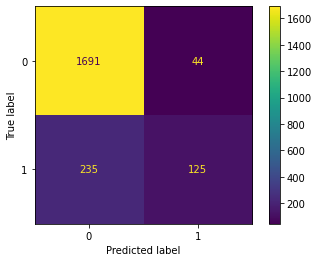

In [ ]:
# Plot a confusion matrix

plot_confusion_matrix(clf, X_test, y_test)
confusion_matrix = plot_to_str()

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

In [ ]:
model_card.model_details.name = 'Breast Cancer Wisconsin (Diagnostic) Dataset'
model_card.model_details.overview = (
    'This model predicts whether breast cancer is benign or malignant based on '
    'image measurements.')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.references = [
    mctlib.Reference(reference='https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)'),
    mctlib.Reference(reference='https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf')
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Breast cancer diagnosis')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Breast cancer diagnosis')]
model_card.considerations.users = [mctlib.User(description='Medical professionals'), mctlib.User(description='ML researchers')]

"""
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=mean_radius_train),
    mctlib.Graphic(image=mean_texture_train)
]
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_test)} rows with {len(X_test.columns)} features')
model_card.model_parameters.data[1].graphics.collection = [
    mctlib.Graphic(image=mean_radius_test),
    mctlib.Graphic(image=mean_texture_test)
]
"""
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve),
    mctlib.Graphic(image=confusion_matrix)
]

mct.update_model_card(model_card)

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format()

display.display(display.HTML(html))